In [1]:
!git clone https://github.com/eriklindernoren/PyTorch-YOLOv3
!cd PyTorchYOLOv3/

Cloning into 'PyTorch-YOLOv3'...
remote: Enumerating objects: 724, done.
remote: Total 724 (delta 0), reused 0 (delta 0), pack-reused 724
Receiving objects: 100% (724/724), 16.18 MiB | 41.10 MiB/s, done.
Resolving deltas: 100% (411/411), done.
/bin/bash: line 0: cd: PyTorchYOLOv3/: No such file or directory


In [2]:
!sudo pip3 install -r PyTorchYOLOv3/requirements.txt

  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15354 sha256=b185c61bf4c2cbf72355703a3d82bfc0e879c97290cf65628cf55e6de3bd1f94
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built terminaltables


# Выбор модели

В выборе модели мне помогла статья, которую я прочитал незадолго до получения тестового задания, а точнее вторая её часть - https://habr.com/ru/company/mipt/blog/458190/

Статья очень подробно описывает развитие различных архитектур и разделяет их на несколько групп. Это помогает хотя бы немножко осознать вектор развития этой области. Тк в постановке задачи не было задании сегментации, но были классификация и определение bb - я остановился на группе сетей использующих One-stage подход. Из них я выбрал детектор YOLO v3, в которой за извлечение признаков отвечала Darknet-53, разработанная авторами специально для этого детектора.

Помимо этой статьи я постарался порыться и в источник, особенно источниках с известного архива (https://arxiv.org/pdf/1809.02165v3.pdf). Но скажу честно, в подобных статьях мне пока разбираться очень сложно.

In [0]:
import torch
from torchvision import models
from torchsummary import summary

from PyTorchYOLOv3 import models

In [0]:
"""Посмотрим структуру используемой модели"""
model = models.Darknet("PyTorchYOLOv3/config/yolov3.cfg")
print(model)

Darknet(
  (module_list): ModuleList(
    (0): Sequential(
      (conv_0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm_0): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (leaky_0): LeakyReLU(negative_slope=0.1)
    )
    (1): Sequential(
      (conv_1): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (batch_norm_1): BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (leaky_1): LeakyReLU(negative_slope=0.1)
    )
    (2): Sequential(
      (conv_2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (batch_norm_2): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (leaky_2): LeakyReLU(negative_slope=0.1)
    )
    (3): Sequential(
      (conv_3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm_3): BatchNorm2d(64, eps=1e-05, momen

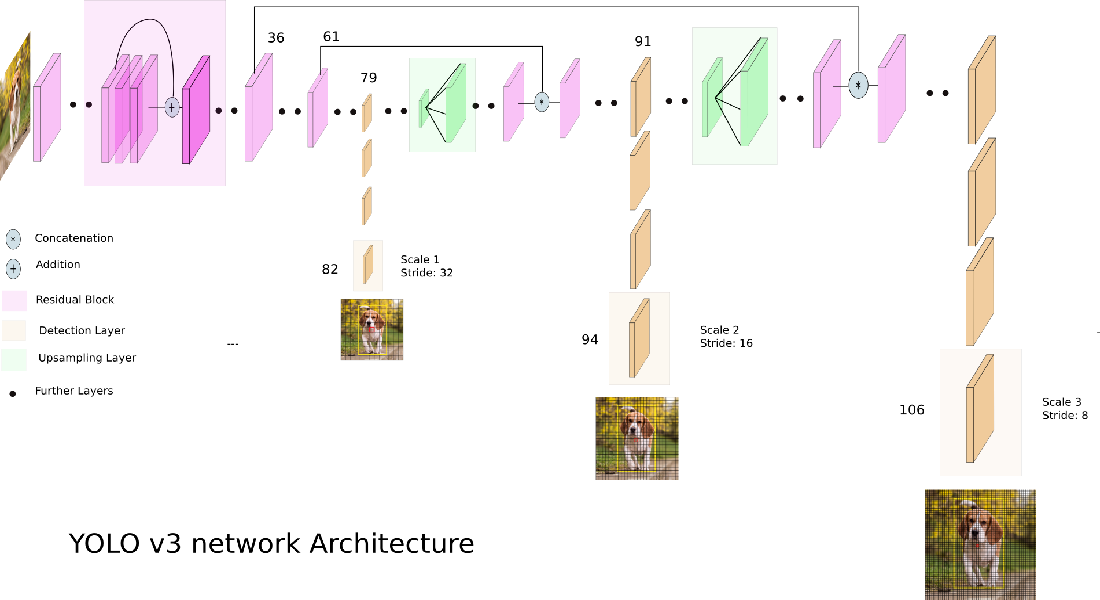

In [0]:
"""Нагляднее"""
yolo_im = Image.open('yolo.png', 'r')
yolo_im = yolo_im.resize((1100, 600))
display(yolo_im)

In [7]:
"""Подгрузим обученные веса"""
%cd /content/PyTorchYOLOv3/weights/
!bash download_weights.sh

/content/PyTorchYOLOv3/weights
--2020-01-25 08:56:37--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  66.3MB/s    in 3.8s    

2020-01-25 08:56:41 (61.9 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2020-01-25 08:56:41--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  46.3MB/s    in 0.7s    

2020-01-25 08:56:42 (46.3 MB/s) - ‘yolov3-tiny.weights’ s

In [0]:
%cd /content/PyTorchYOLOv3/data/
!bash get_coco_dataset.sh

In [0]:
!python3 test.py --weights_path weights/yolov3.weights

In [0]:
"""Тестирование предобученной сети"""
!ls data/samples/
!python3 detect.py --image_folder data/samples/

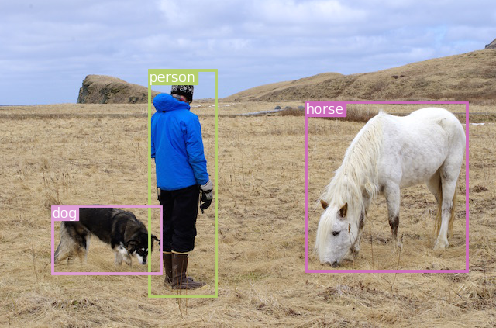

In [0]:
"""Один из результатов"""
test_im = Image.open('/content/PyTorchYOLOv3/output/field.png', 'r')
#yolo_im = yolo_im.resize((1100, 600))
display(test_im)

# Подготовим данные для обучения под консольную утилиту указанную в источнике https://github.com/eriklindernoren/PyTorch-YOLOv3


Мне повезло найти очень интересный датасет http://mmlab.ie.cuhk.edu.hk/projects/DeepFashion.html
Из него в силу обстоятельств я использовал только одну часть изображений (на простом фоне, из магазина) и то в низком разрешении. 

In [8]:
%cd /content/PyTorchYOLOv3/
import cv2
from PIL import Image
import os

import torch
from torchvision import models
from torchsummary import summary

from PyTorchYOLOv3 import models

/content/PyTorchYOLOv3


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp /content/drive/'My Drive'/moda/img.zip .

In [0]:
!mkdir -p '/content/PyTorchYOLOv3/data/custom/images/'
!unzip img.zip -d '/content/PyTorchYOLOv3/data/custom/images/'

Функция для подготовки данных под готовый шаблон. В изначальном виде метки были записаны в формате 4 координат (2 точки - левая нижняя, правая верхняя). Однако эта сеть использовала другой формат - 2 координаты для центра + ширина и высота.
Кроме того, сами координаты надо было скаллировать к диапазону от 0 до 1.
И разделить выборки при помощи разделения путей в разные файлы.


In [0]:
def divide_info(source_file, source_path, train_path, valid_path):
    train_f = open(train_path, 'w')
    valid_f = open(valid_path, 'w')
    os.makedirs(os.path.normpath(source_path + 'labels/'), exist_ok=True)
    imgs_dir = os.path.normpath(source_path + 'images/')
    with open(source_file, 'r') as file:
        for index, line in enumerate(file):
          data = line.split()
          class_cloth = str(int(data[1]) - 1)
          img_path = os.path.normpath(imgs_dir + '/' + data[0])
          img = cv2.imread(img_path)
          x_s, y_s, ch = img.shape
          if len(data) < 5:
            print(data)
            continue
          try:
            w_c = int(data[5]) - int(data[3])
            h_c = int(data[6]) - int(data[4])
            x_c = int(data[3]) + w_c // 2
            y_c = int(data[4]) + h_c // 2
          except IndexError:
            print(data)
          """Разбиение на тренировочную и валидационную выборки (пока без кросс-валидации)"""
          train_or_valid = train_f if index % 100 else valid_f
          train_or_valid.write(f'{img_path}\n')
          """каждому изображению сопоставляется файл с меткой класса и координатами bounding box-а"""
          bb_path = os.path.normpath(source_path + 'labels/' + data[0][:-3] + 'txt')
          os.makedirs(os.path.dirname(bb_path), exist_ok=True)
          with open(bb_path, 'w') as bb_f:
            bb_f.write(f'{class_cloth} {x_c / x_s} {y_c / y_s} {w_c / x_s} {h_c / y_s}')
    train_f.close()
    valid_f.close()

In [0]:
src_f = '/content/list_bbox_inshop.txt'
src_p = '/content/PyTorchYOLOv3/data/custom/'
tr_p = '/content/PyTorchYOLOv3/data/custom/train.txt'
val_p = '/content/PyTorchYOLOv3/data/custom/valid.txt'
divide_info(src_f, src_p, tr_p, val_p)

In [0]:
!mv /content/classes.names /content/PyTorchYOLOv3/data/custom
!mv /content/custom.data /content/PyTorchYOLOv3/config

In [0]:
!mv /content/x_deef4827.jpg /content/PyTorchYOLOv3/data/samples

## Само обучение

In [0]:
%rm -r /content/PyTorchYOLOv3/data/custom

In [15]:
!ls
%cd /content/PyTorchYOLOv3/config/
!bash create_custom_model.sh 3           

assets	data	   img.zip  models.py	 README.md	   test.py   utils
config	detect.py  LICENSE  __pycache__  requirements.txt  train.py  weights
/content/PyTorchYOLOv3/config


In [16]:
%cd /content/PyTorchYOLOv3

/content/PyTorchYOLOv3


In [17]:
"""Тк в мощностях я ограничен - запущу обучение с весами, заранее обученными на imagenet"""
!python3 -W ignore train.py --epochs 10 --batch_size 16 --model_def config/yolov3-custom.cfg --data_config config/custom.data --pretrained_weights weights/darknet53.conv.74

Namespace(batch_size=16, checkpoint_interval=1, compute_map=False, data_config='config/custom.data', epochs=10, evaluation_interval=1, gradient_accumulations=2, img_size=416, model_def='config/yolov3-custom.cfg', multiscale_training=True, n_cpu=8, pretrained_weights='weights/darknet53.conv.74')



---- [Epoch 0/10, Batch 0/3262] ----
+------------+--------------+--------------+--------------+
| Metrics    | YOLO Layer 0 | YOLO Layer 1 | YOLO Layer 2 |
+------------+--------------+--------------+--------------+
| grid_size  | 16           | 32           | 64           |
| loss       | 68.418228    | 74.288078    | 84.072853    |
| x          | 0.133218     | 0.139473     | 0.116872     |
| y          | 0.068858     | 0.136067     | 0.114343     |
| w          | 0.600535     | 0.856034     | 3.872723     |
| h          | 0.393612     | 1.447850     | 6.571112     |
| conf       | 66.519821    | 71.000252    | 72.692551    |
| cls        | 0.702185     | 0.708407     | 0.705252     |
| cl

In [0]:
!cp -R /content/drive/'My Drive'/moda/samples /content/PyTorchYOLOv3/data/

In [0]:
"""Тестирование предобученной сети"""
%cd /content/PyTorchYOLOv3/
!python3 detect.py --model_def config/yolov3-custom.cfg --class_path data/custom/classes.names --weights_path yolov3_ml_9.pth

# Результат


Есть и хорошие варианты (в основном конечно же на изображениях, схожих с тренировочной выборкой) 

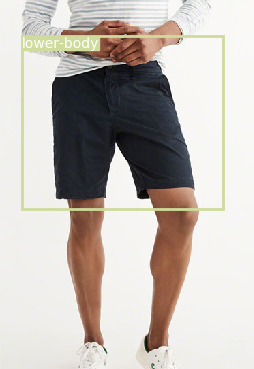

In [20]:
test_im = Image.open('/content/PyTorchYOLOv3/output/clshort.png', 'r')
display(test_im)

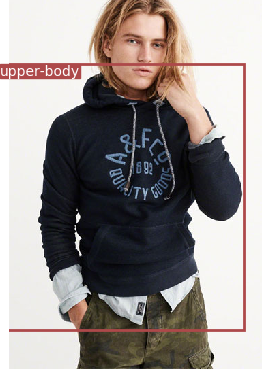

In [21]:
test_im = Image.open('/content/PyTorchYOLOv3/output/hood.png', 'r')
display(test_im)

А вот на моём фото 10-летней давности сработало не прям чтобы очень хорошо :)

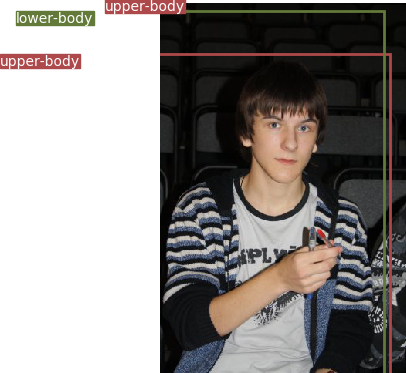

In [27]:
test_im = Image.open('/content/PyTorchYOLOv3/output/x_deef4827.png', 'r')
display(test_im)

Или вот ещё. 

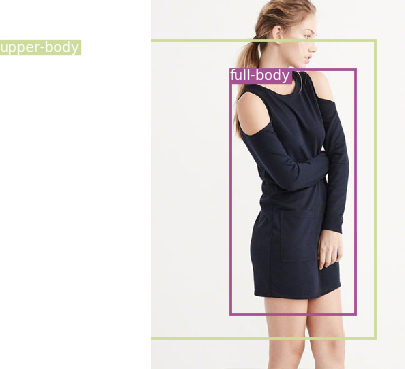

In [22]:
test_im = Image.open('/content/PyTorchYOLOv3/output/dress.png', 'r')
display(test_im)

Знаю, что можно можно настроить решение для спорных ситуаций при наложении bb, но пока не освоил это на 100%, а с задачкой и так уже затянул)

# Копания в коде запуска

В основном код использовал для локализации возникающих ошибок и настройки удобства обучения. + было интересно запустить модель напрямую, без скрипта.

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
from __future__ import division

from models import *
from utils.logger import *
from utils.utils import *
from utils.datasets import *
from utils.parse_config import *
from test import evaluate

from terminaltables import AsciiTable

import os
import sys
import time
import datetime
import argparse

import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import torch.optim as optim

In [0]:
ml_epochs = 3
ml_bs = 16
ml_ga = 2
ml_model_def = "config/yolov3-custom.cfg"
ml_data_config = "config/custom.data"
ml_pw = None
ml_cpu = 8
ml_img_size = 416
ml_ch_interval = 1
ml_ev_interval = 1
ml_com_map = False
ml_mul_trai = True

logger = Logger("logs")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

os.makedirs("output", exist_ok=True)
os.makedirs("checkpoints", exist_ok=True)

# Get data configuration
data_config = parse_data_config(ml_data_config)
train_path = data_config["train"]
valid_path = data_config["valid"]
class_names = load_classes(data_config["names"])
print(class_names, '+++')
# Initiate model
model = Darknet(ml_model_def).to(device)
model.apply(weights_init_normal)

# If specified we start from checkpoint
if ml_pw:
    if ml_pw.endswith(".pth"):
        model.load_state_dict(torch.load(ml_pw))
    else:
        model.load_darknet_weights(ml_pw)

# Get dataloader
dataset = ListDataset(train_path, augment=True, multiscale=ml_mul_trai)
dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=ml_bs,
    shuffle=True,
    num_workers=ml_cpu,
    pin_memory=True,
    collate_fn=dataset.collate_fn,
)

optimizer = torch.optim.Adam(model.parameters())

metrics = [
    "grid_size",
    "loss",
    "x",
    "y",
    "w",
    "h",
    "conf",
    "cls",
    "cls_acc",
    "recall50",
    "recall75",
    "precision",
    "conf_obj",
    "conf_noobj",
]

for epoch in range(ml_epochs):
    model.train()
    start_time = time.time()
    for batch_i, (_, imgs, targets) in enumerate(dataloader):
        batches_done = len(dataloader) * epoch + batch_i

        imgs = Variable(imgs.to(device))
        targets = Variable(targets.to(device), requires_grad=False)

        loss, outputs = model(imgs, targets)
        loss.backward()

        if batches_done % ml_ga:
            # Accumulates gradient before each step
            optimizer.step()
            optimizer.zero_grad()

        # ----------------
        #   Log progress
        # ----------------

        log_str = "\n---- [Epoch %d/%d, Batch %d/%d] ----\n" % (epoch, ml_epochs, batch_i, len(dataloader))

        metric_table = [["Metrics", *[f"YOLO Layer {i}" for i in range(len(model.yolo_layers))]]]
        torch.save(model.state_dict(), "/content/checkpoints/yolov3_ml.pth")
        print(model.state_dict())
        break
        # Log metrics at each YOLO layer
        if not batch_i % 100:
            for i, metric in enumerate(metrics):
                formats = {m: "%.6f" for m in metrics}
                formats["grid_size"] = "%2d"
                formats["cls_acc"] = "%.2f%%"
                row_metrics = [formats[metric] % yolo.metrics.get(metric, 0) for yolo in model.yolo_layers]
                metric_table += [[metric, *row_metrics]]

                # Tensorboard logging
                tensorboard_log = []
                for j, yolo in enumerate(model.yolo_layers):
                    for name, metric in yolo.metrics.items():
                        if name != "grid_size":
                            tensorboard_log += [(f"{name}_{j+1}", metric)]
                tensorboard_log += [("loss", loss.item())]
                logger.list_of_scalars_summary(tensorboard_log, batches_done)

            log_str += AsciiTable(metric_table).table
            log_str += f"\nTotal loss {loss.item()}"

            # Determine approximate time left for epoch
            epoch_batches_left = len(dataloader) - (batch_i + 1)
            time_left = datetime.timedelta(seconds=epoch_batches_left * (time.time() - start_time) / (batch_i + 1))
            log_str += f"\n---- ETA {time_left}"
            print('save')

            print(log_str)

        model.seen += imgs.size(0)
    if epoch % ml_ev_interval == 0:
        os.makedirs(os.path.dirname("/content/checkpoints/yolov3_ml.pth"), exist_ok=True)
        torch.save(model.state_dict(), "/content/checkpoints/yolov3_ml.pth")
        print("\n---- Evaluating Model ----")
        # Evaluate the model on the validation set
        precision, recall, AP, f1, ap_class = evaluate(
            model,
            path=valid_path,
            iou_thres=0.5,
            conf_thres=0.5,
            nms_thres=0.5,
            img_size=ml_img_size,
            batch_size=16,
        )
        print(precision, recall, AP, f1, ap_class)
        evaluation_metrics = [
            ("val_precision", precision.mean()),
            ("val_recall", recall.mean()),
            ("val_mAP", AP.mean()),
            ("val_f1", f1.mean()),
        ]
        logger.list_of_scalars_summary(evaluation_metrics, epoch)

        # Print class APs and mAP
        ap_table = [["Index", "Class name", "AP"]]
        try:
            for i, c in enumerate(ap_class):
                ap_table += [[c, class_names[c], "%.5f" % AP[i]]]
            print(AsciiTable(ap_table).table)
            print(f"---- mAP {AP.mean()}")
        except IndexError:
            print('IndexError')
    if epoch % ml_ch_interval == 0:
        torch.save(model.state_dict(), f"checkpoints/yolov3_ckpt_%d.pth" % epoch)


In [0]:
print(torch.save(model, "yolov3_ml.pth"))

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Darknet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ModuleList. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.

None
